In [ ]:
"""
Preliminary EDA of bad and good frames
on blur detection

1. Percentage of clear
    - Bad frames: 42%
    - Good frames: 83%
    
2. Laplacian ratio of cat face to whole picture
    - Bad mean: 0.115
    - Good mean: 0.186


"""

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
bad = pd.read_csv('blurriness_bad.csv')
bad['label'] = ['bad']*bad.shape[0]
good = pd.read_csv('blurriness_good.csv')
good['label'] = ['good']*good.shape[0]

In [3]:
all_df = pd.concat([bad,good],axis=0)
all_df

,filename,lp_ratio,blur,label
0,bad_0000.jpg,0.216969,0,bad
1,bad_0001.jpg,0.040592,0,bad
2,bad_0002.jpg,0.017750,1,bad
3,bad_0003.jpg,0.007987,1,bad
4,bad_0004.jpg,0.363693,0,bad
...,...,...,...,...
103,good_0103.jpg,0.192125,0,good
104,good_0104.jpg,0.060782,0,good
105,good_0105.jpg,0.036906,0,good
106,good_0106.jpg,0.424538,0,good


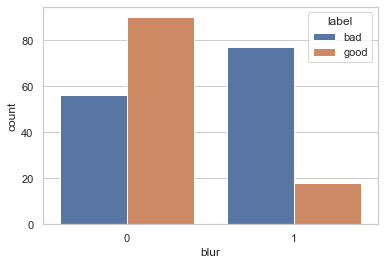

In [4]:
# 0:clear, 1:blurry
sns.set_theme(style="whitegrid")
g = sns.countplot(
    data=all_df,
    x="blur", hue="label"
)

In [5]:
stats = pd.DataFrame([bad.blur.value_counts(sort=False).tolist(),\
              good.blur.value_counts(sort=False).tolist()],\
            index=['bad','good'])
stats.columns = ['0:clear','1:blurry']
stats['clear_perc'] = stats['0:clear']/(stats['0:clear']+stats['1:blurry'])
stats

,0:clear,1:blurry,clear_perc
bad,56,77,0.421053
good,90,18,0.833333


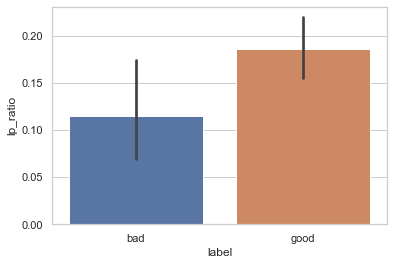

In [6]:
ax = sns.barplot(x="label", y="lp_ratio", data=all_df)

In [7]:
bad.describe()

,lp_ratio,blur
count,133.000000,133.000000
mean,0.114853,0.578947
std,0.317434,0.495595
min,0.001639,0.000000
25%,0.005035,0.000000
50%,0.020737,1.000000
75%,0.083164,1.000000
max,2.902196,1.000000


In [8]:
good.describe()

,lp_ratio,blur
count,108.000000,108.000000
mean,0.186197,0.166667
std,0.169966,0.374415
min,0.005848,0.000000
25%,0.040889,0.000000
50%,0.093071,0.000000
75%,0.347582,0.000000
max,0.556328,1.000000
